In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio
from ipywidgets import interact, widgets



In [123]:
df = pd.read_excel('data.xlsx', engine='openpyxl')
df

,Maquina,Fab.,Modelo,Clase,Tipo,Area,Isla,Juego,Nombre progr,Coin IN,Coin IN PROM,Ganancia,Ganancia PROM,Juegos jugados,Jugadas PROM,AP,% Ret
0,22300001,Ainsworth,A640,TM,TM,Restaurant Oval (3),18,SUPER CHARGED 7s,-,96699725.0,294816.234756,8394149.25,25591.918445,2060474,6281.932927,46.930815,0.086806
1,22300002,Ainsworth,A640,TM,PROST,Restaurant Oval (3),18,PACMAN DYNAMIC EDITION,-,39566242.5,120628.788110,4006809.00,12215.881098,1391648,4242.829268,28.431214,0.101268
2,22300003,Ainsworth,A640,TM,PROST,Restaurant Oval (3),23,PACMAN WILD EDITION,-,47933707.5,146139.352134,4723116.00,14399.743902,1676520,5111.341463,28.591193,0.098534
3,22300004,Ainsworth,A640,TM,TM,Restaurant Oval (3),18,SUPER CRYSTAL 7s,-,68141950.0,207749.847561,5622258.25,17141.031250,1822780,5557.256098,37.383530,0.082508
4,22300005,Ainsworth,A640,TM,PROST,Restaurant Oval (3),18,Ice Money,-,71777075.0,218832.545732,6808573.00,20757.844512,1566543,4776.045732,45.818771,0.094857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,22301082,BALLY,V32,RE,RULET,Rivadavia (8),21,ROULETTE,NaN,1692650.0,423162.500000,29000.00,7250.000000,893,223.250000,1895.464726,0.017133
876,22301083,BALLY,V32,RE,RULET,Rivadavia (8),21,ROULETTE,NaN,1027625.0,256906.250000,126700.00,31675.000000,408,102.000000,2518.688725,0.123294
877,22301084,BALLY,V32,RE,RULET,Rivadavia (8),32,ROULETTE,NaN,1727200.0,431800.000000,220750.00,55187.500000,679,169.750000,2543.740795,0.127808
878,22301085,BALLY,V32,RE,RULET,Rivadavia (8),32,ROULETTE,NaN,1317475.0,329368.750000,45825.00,11456.250000,848,212.000000,1553.626179,0.034782


In [162]:
filtro = df[["Maquina","Juego","Area","Tipo","Fab.", "Coin IN", "Ganancia","Juegos jugados"]]
filtro



,Maquina,Juego,Area,Tipo,Fab.,Coin IN,Ganancia,Juegos jugados
0,22300001,SUPER CHARGED 7s,Restaurant Oval (3),TM,Ainsworth,96699725.0,8394149.25,2060474
1,22300002,PACMAN DYNAMIC EDITION,Restaurant Oval (3),PROST,Ainsworth,39566242.5,4006809.00,1391648
2,22300003,PACMAN WILD EDITION,Restaurant Oval (3),PROST,Ainsworth,47933707.5,4723116.00,1676520
3,22300004,SUPER CRYSTAL 7s,Restaurant Oval (3),TM,Ainsworth,68141950.0,5622258.25,1822780
4,22300005,Ice Money,Restaurant Oval (3),PROST,Ainsworth,71777075.0,6808573.00,1566543
...,...,...,...,...,...,...,...,...
875,22301082,ROULETTE,Rivadavia (8),RULET,BALLY,1692650.0,29000.00,893
876,22301083,ROULETTE,Rivadavia (8),RULET,BALLY,1027625.0,126700.00,408
877,22301084,ROULETTE,Rivadavia (8),RULET,BALLY,1727200.0,220750.00,679
878,22301085,ROULETTE,Rivadavia (8),RULET,BALLY,1317475.0,45825.00,848


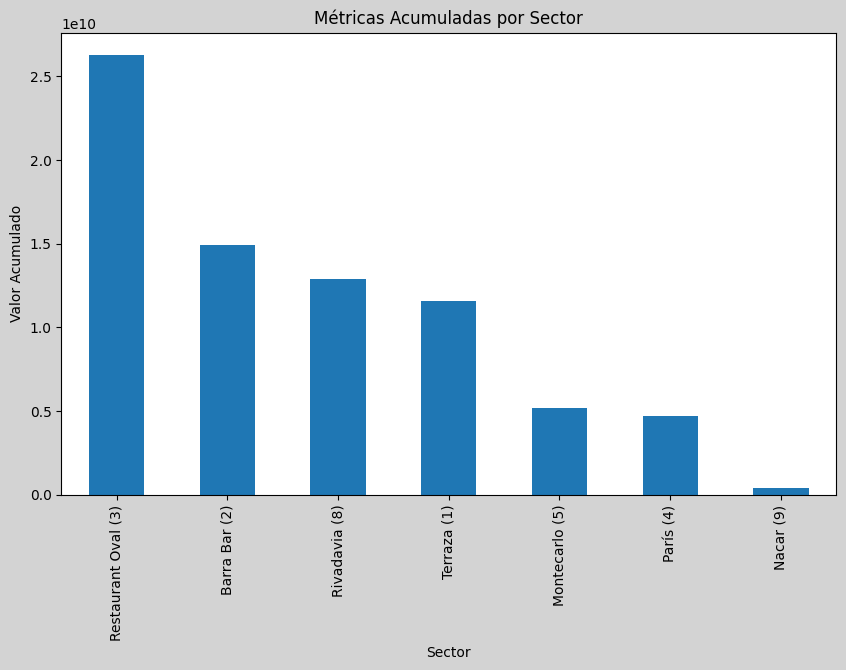

In [200]:
filtro = df[["Area", "Coin IN"]]
acumulado_por_sector = filtro.groupby("Area")["Coin IN"].sum()
acumulado_por_sector = acumulado_por_sector.sort_values(ascending=False)

# Graficar barras para cada métrica en función del sector
plt.figure(figsize=(14, 8), facecolor='#D3D3D3')
acumulado_por_sector.plot(kind="bar", figsize=(10, 6))
plt.title("Métricas Acumuladas por Sector")
plt.xlabel("Sector")
plt.ylabel("Valor Acumulado")
plt.show()


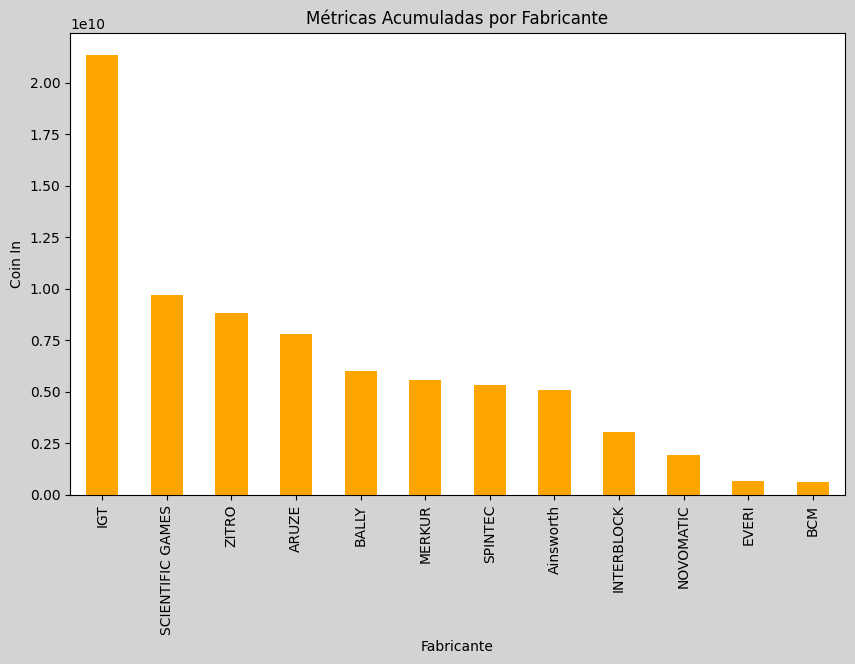

In [201]:
filtro = df[["Fab.", "Coin IN"]]
acumulado_coin_in_por_fab = filtro.groupby("Fab.")["Coin IN"].sum()
acumulado_coin_in_por_fab = acumulado_coin_in_por_fab.sort_values(ascending=False)


# Graficar barras para cada métrica en función del sector
plt.figure(figsize=(14, 8), facecolor='#D3D3D3') 
acumulado_coin_in_por_fab.plot(kind="bar", figsize=(10, 6),color = "orange")
plt.title("Métricas Acumuladas por Fabricante")
plt.xlabel("Fabricante")
plt.ylabel("Coin In")

plt.show()



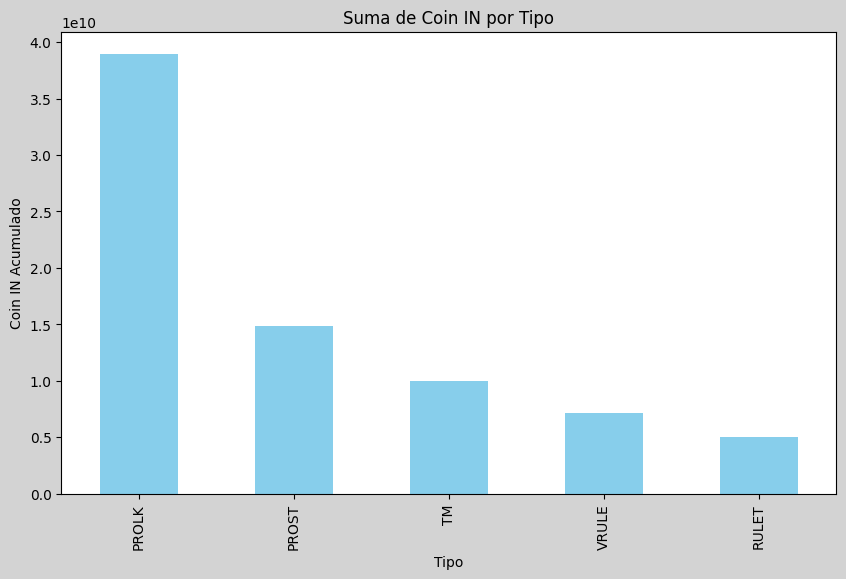

In [193]:
filtro = df[["Tipo", "Coin IN"]]

acumulado_coin_in_por_tipo = filtro.groupby("Tipo")["Coin IN"].sum()
acumulado_coin_in_por_tipo = acumulado_coin_in_por_tipo.sort_values(ascending=False)

# Graficar barras para la suma de "Coin IN" por tipo
plt.figure(figsize=(14, 8), facecolor='#D3D3D3')
acumulado_coin_in_por_tipo.plot(kind="bar", figsize=(10, 6), color='skyblue')

plt.title("Suma de Coin IN por Tipo")
plt.xlabel("Tipo")
plt.ylabel("Coin IN Acumulado")

plt.show()


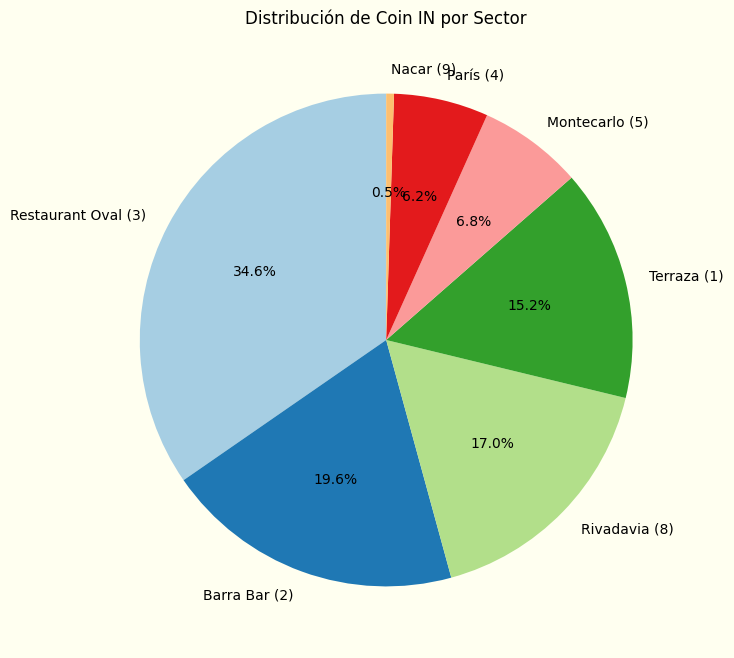

In [207]:
filtro = df[["Area", "Coin IN"]]
# Ordenar el Series por el valor acumulado en orden descendente
acumulado_por_sector = acumulado_por_sector.sort_values(ascending=False)

# Graficar un gráfico de torta para la distribución de "Coin IN" por sector
plt.figure(figsize=(14, 8), facecolor='#FFFFF0')  # Cambiar '#D3D3D3' por el tono de gris que desees
plt.pie(acumulado_por_sector, labels=acumulado_por_sector.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Distribución de Coin IN por Sector")
plt.show()


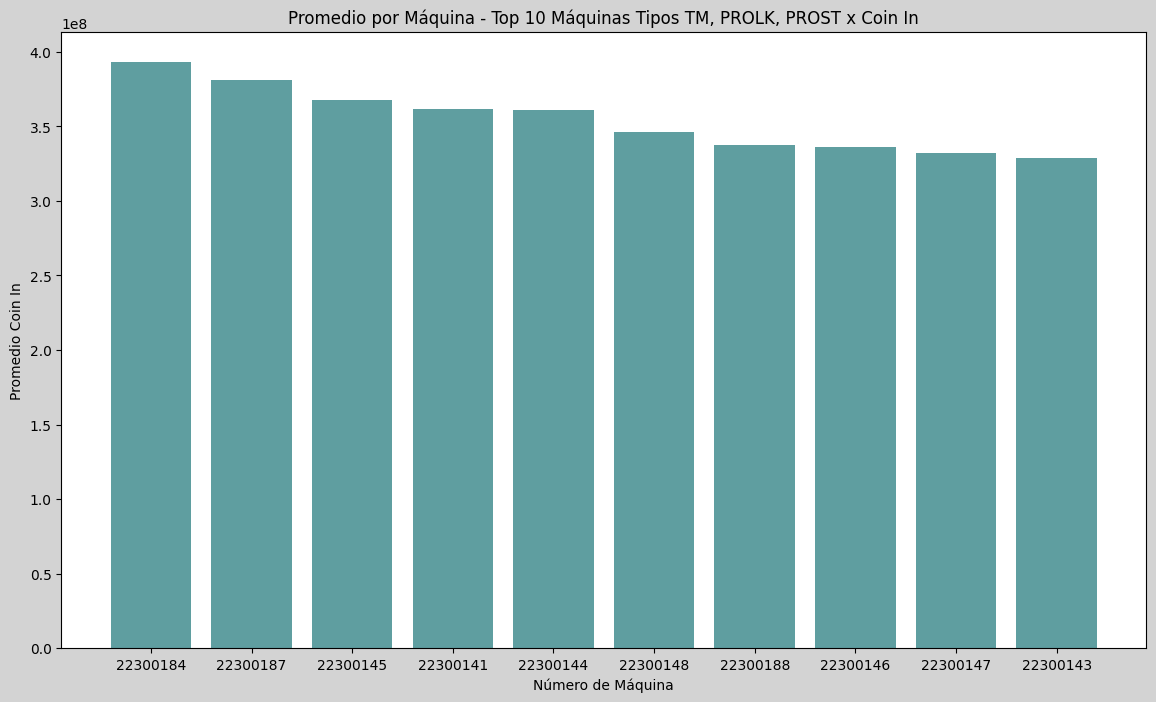

In [195]:
# Lista de tipos seleccionados
tipos_seleccionados = ["TM", "PROLK", "PROST"]
df_filtrado = df[df['Tipo'].isin(tipos_seleccionados)]

# Calcular el promedio por máquina y ordenar de mayor a menor
promedio_por_maquina = df_filtrado.groupby('Maquina')['Coin IN'].mean()
promedio_por_maquina = promedio_por_maquina.sort_values(ascending=False)

# Seleccionar las 10 máquinas con el promedio más alto
top_10_maquinas = promedio_por_maquina.head(10)

plt.figure(figsize=(14, 8), facecolor='#D3D3D3')
bar_plot = plt.bar(range(1, 11), top_10_maquinas.values ,color = "#5F9EA0")
plt.title(f'Promedio por Máquina - Top 10 Máquinas Tipos {", ".join(tipos_seleccionados)} x Coin In')
plt.xlabel('Número de Máquina')
plt.ylabel('Promedio Coin In')

maquinas_nombres = top_10_maquinas.index
plt.xticks(range(1, 11), maquinas_nombres)

plt.show()


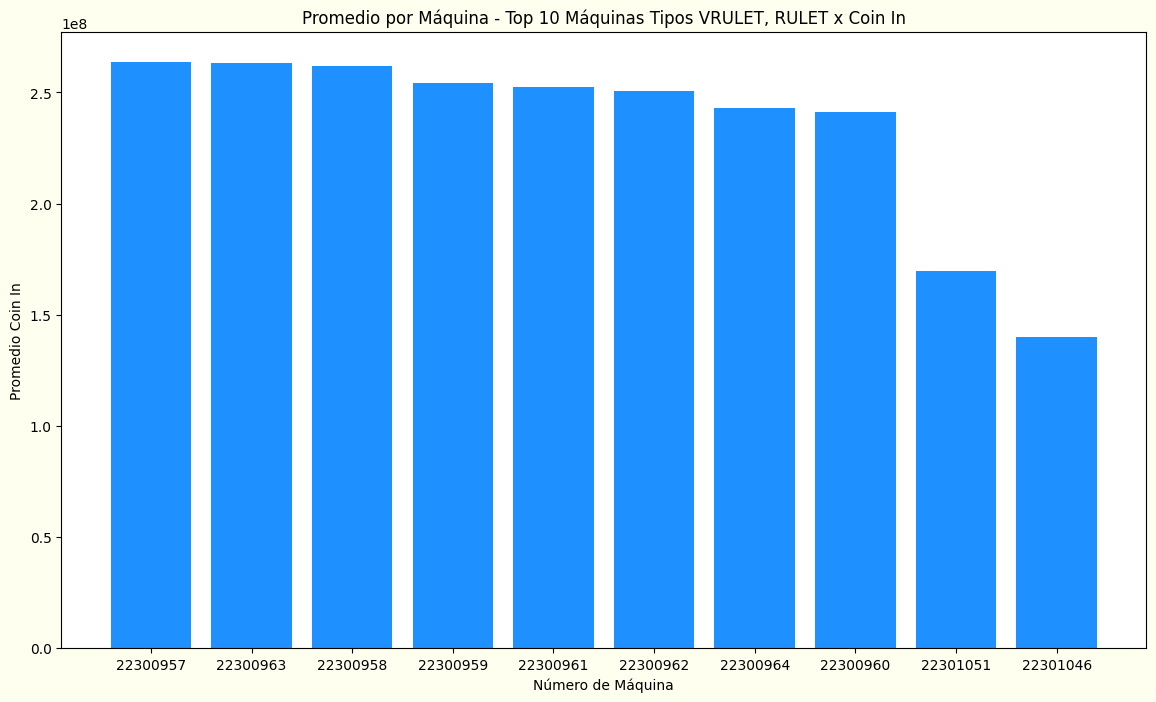

In [209]:
tipos_seleccionados = ["VRULET", "RULET"]
df_filtrado = df[df['Tipo'].isin(tipos_seleccionados)]

# Calcular el promedio por máquina y ordenar de mayor a menor
promedio_por_maquina = df_filtrado.groupby('Maquina')['Coin IN'].mean()
promedio_por_maquina = promedio_por_maquina.sort_values(ascending=False)

# Seleccionar las 10 máquinas con el promedio más alto
top_10_maquinas = promedio_por_maquina.head(10)

plt.figure(figsize=(14, 8), facecolor='#FFFFF0')
bar_plot = plt.bar(range(1, 11), top_10_maquinas.values ,color = "#1E90FF")
plt.title(f'Promedio por Máquina - Top 10 Máquinas Tipos {", ".join(tipos_seleccionados)} x Coin In')
plt.xlabel('Número de Máquina')
plt.ylabel('Promedio Coin In')

maquinas_nombres = top_10_maquinas.index
plt.xticks(range(1, 11), maquinas_nombres)

plt.show()

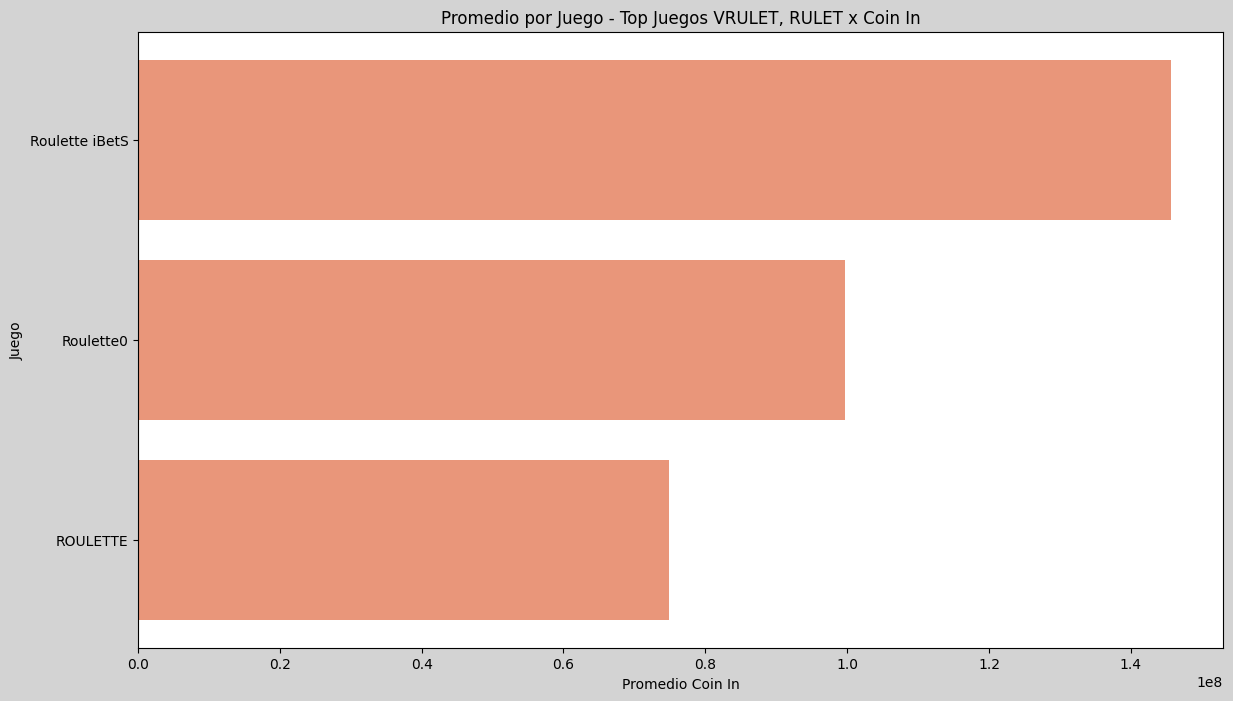

In [211]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'df' con las columnas 'Juego', 'Tipo', 'Coin IN', y otras columnas relevantes.

# Lista de tipos seleccionados
tipos_seleccionados = ["VRULET", "RULET"]

# Filtrar por tipos seleccionados utilizando el método isin
df_filtrado = df[df['Tipo'].isin(tipos_seleccionados)]

# Calcular el promedio por juego y ordenar de mayor a menor
promedio_por_juego = df_filtrado.groupby('Juego')['Coin IN'].mean()
promedio_por_juego = promedio_por_juego.sort_values(ascending=True)

# Seleccionar todos los juegos con el promedio más alto (sin limitar a 10)
top_juegos = promedio_por_juego.head(10)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(14, 8), facecolor='#D3D3D3')  # Cambiar '#D3D3D3' por el tono de gris que desees
bar_plot = plt.barh(range(1, len(top_juegos) + 1), top_juegos.values, color="#E9967A")
plt.title(f'Promedio por Juego - Top Juegos {", ".join(tipos_seleccionados)} x Coin In')
plt.xlabel('Promedio Coin In')
plt.ylabel('Juego')
plt.yticks(range(1, len(top_juegos) + 1), juegos_nombres)
plt.show()


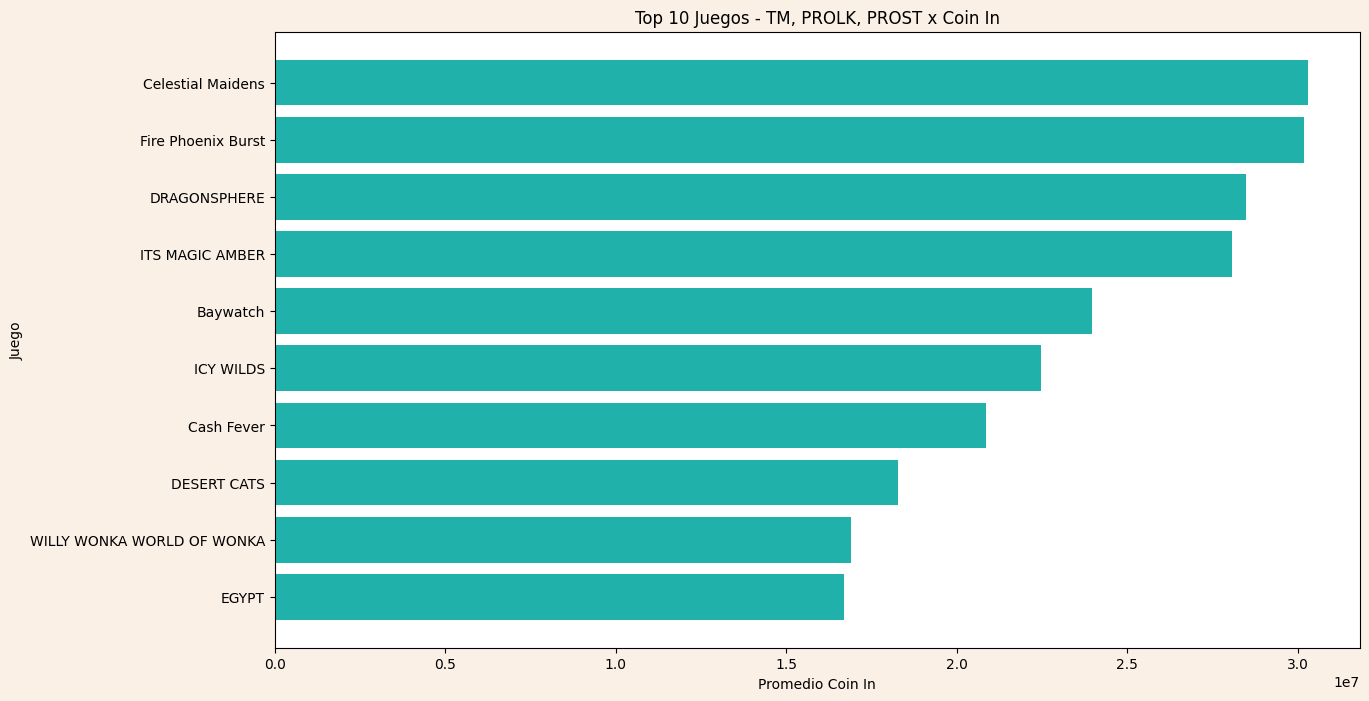

In [216]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'df' con las columnas 'Juego', 'Tipo', 'Coin IN', y otras columnas relevantes.

# Lista de tipos seleccionados
tipos_seleccionados = ["TM", "PROLK", "PROST"]

# Filtrar por tipos seleccionados utilizando el método isin
df_filtrado = df[df['Tipo'].isin(tipos_seleccionados)]

# Calcular el promedio por juego y ordenar de mayor a menor
promedio_por_juego = df_filtrado.groupby('Juego')['Coin IN'].mean()
promedio_por_juego = promedio_por_juego.sort_values(ascending=True)

# Seleccionar los top 10 juegos con el promedio más alto
top_10_juegos = promedio_por_juego.head(10)

# Crear el gráfico de barras horizontales para los top 10 juegos
plt.figure(figsize=(14, 8), facecolor='#FAF0E6')  # Cambiar '#D3D3D3' por el tono de gris que desees
bar_plot = plt.barh(range(1, len(top_10_juegos) + 1), top_10_juegos.values, color="#20B2AA")
plt.title(f'Top 10 Juegos - {", ".join(tipos_seleccionados)} x Coin In')
plt.xlabel('Promedio Coin In')
plt.ylabel('Juego')
plt.yticks(range(1, len(top_10_juegos) + 1), top_10_juegos.index)
plt.show()
